In [1]:
import os
import ipyplot

from RanDepict import RandomDepictor, RandomMarkushStructureCreator
import RanDepict
RanDepict.__version__

'1.1.8'

## Depict chemical structures with CDK, RDKit, Indigo or PIKAChU

After calling an instance of RandomDepictor, depictions with randomly chosen parameters are created by calling the functions `cdk_depict`, `rdkit_depict`, `indigo_depict` and `pikachu_depict`.


The SMILES or mol_block string needs to be given.

Each of these functions returns an np.array which represents an RGB image of the chemical structure.

_________________CDK depictions_________________



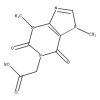
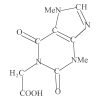
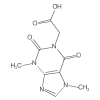


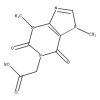
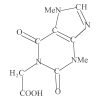
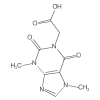

_________________RDKit depictions_________________



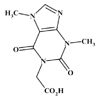
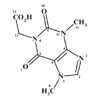
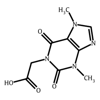


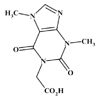
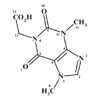
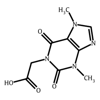

_________________Indigo depictions_________________



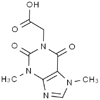
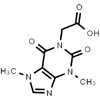
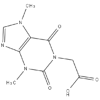


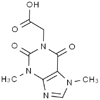
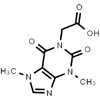
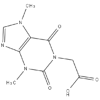

_________________PIKAChU depictions_________________



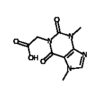
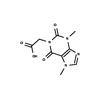
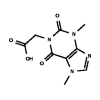


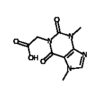
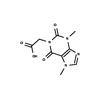
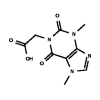

In [2]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
depiction_img_shape = (100, 100)

# random_depictor can be called with a seed for reproducible results (defaults to 42)
with RandomDepictor(seed = 42) as depictor:
    # CDK depictions
    cdk_images = []
    for _ in range(3):
        cdk_images.append(depictor.cdk_depict(smiles=smiles, shape=depiction_img_shape))
    print("_________________CDK depictions_________________")
    ipyplot.plot_images(cdk_images, max_images=10, img_width=100)
    
    # RDKit Depictions
    rdkit_images = []
    for _ in range(3):
        rdkit_images.append(depictor.rdkit_depict(smiles, depiction_img_shape))
    print("_________________RDKit depictions_________________")
    ipyplot.plot_images(rdkit_images, max_images=10, img_width=100)
    
    # Indigo Depictions
    indigo_images = []
    for _ in range(3):
        indigo_images.append(depictor.indigo_depict(smiles, depiction_img_shape))
    print("_________________Indigo depictions_________________")
    indigo_images = list([img for img in indigo_images if img is not None])
    ipyplot.plot_images(indigo_images, max_images=10, img_width=100)
    
    # PIKAChU Depictions
    pikachu_images = []
    for _ in range(3):
        pikachu_images.append(depictor.pikachu_depict(smiles, depiction_img_shape))
    print("_________________PIKAChU depictions_________________")
    ipyplot.plot_images(pikachu_images, max_images=10, img_width=100)

## Depict chemical structures with a random toolkit

After calling an instance of RandomDepictor, the function
 
 - random_depiction(
       smiles: str, 
       image_shape: Tuple[int,int]
   )
 
The SMILES string needs to be given, the image_shape defaults to (299,299).

It returns an np.array which represents an RGB image of the chemical structure.

**Markush structures can be handled by the random_depiction() method. As not all of the used toolkits handle every type of markush structure equally well, we recommend using random_depiction as it filters the potential toolkits used for the depiction based on the input SMILES.**


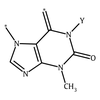
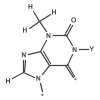
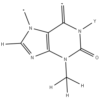
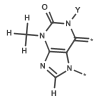
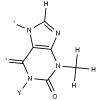
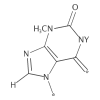
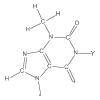
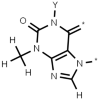
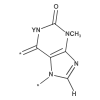
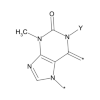
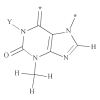
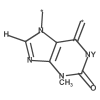
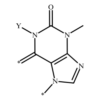
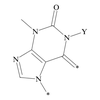
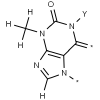
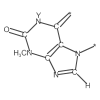
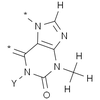
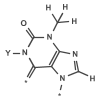
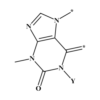
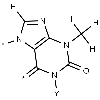


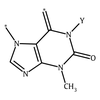
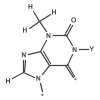
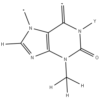
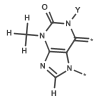
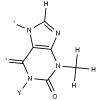
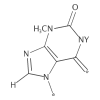
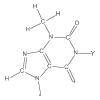
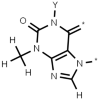
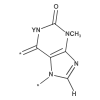
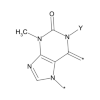
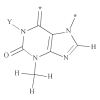
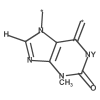
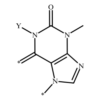
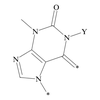
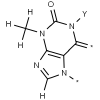
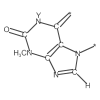
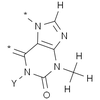
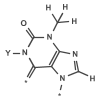
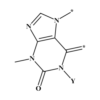
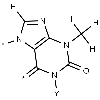

In [3]:
smiles = "[R1]N1C=NC2=C1C(=[X])N(C(=O)N2C)[Y]"

with RandomDepictor(2, hand_drawn=False) as depictor:
    smiles = depictor._cdk_add_explicite_hydrogen_to_smiles(smiles)
    random_images = []
    for _ in range(20):
        random_images.append(depictor.random_depiction(smiles, shape=(100,100)))

ipyplot.plot_images(random_images, max_images=20, img_width=100)

## Create random depictions with random augmentations

After calling an instance of RandomDepictor, this instance can simply be called as a function in order to generate a chemical structure depiction using CDK, RDKit, Indigo or PIKAChU (randomly chosen) and apply random augmentations. The augmentations consist of random imgaug augmentations and randomly added chemical ID labels or curved arrows


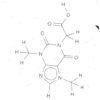
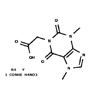
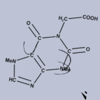
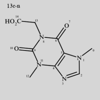
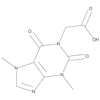
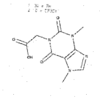
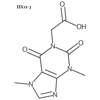
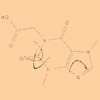
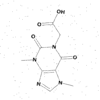
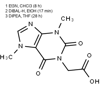
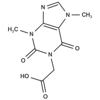
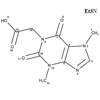
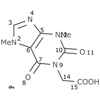
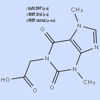
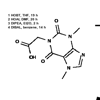
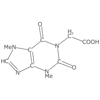
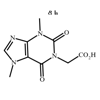
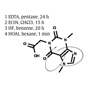
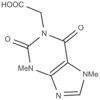
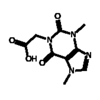


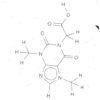
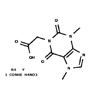
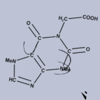
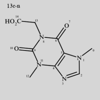
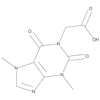
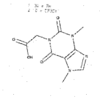
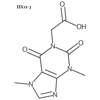
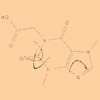
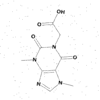
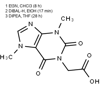
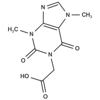
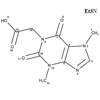
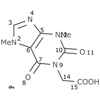
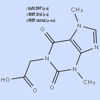
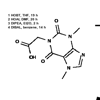
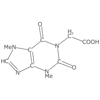
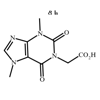
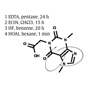
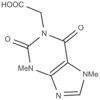
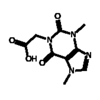

In [4]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor() as depictor:
    random_augmented_images = []
    for _ in range(20):
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=100)

## Create random depictions with cxSMILES with coordinates

Simply call the method `random_depiction_with_coordinates` of the `RandomDepictor to` generate a chemical structure depiction using CDK, RDKit, Indigo and apply random augmentations if desired. This function returns the depiction and a cxSMILES string that contains dimensionless coordinates that refer to the atom coordinates in the depiction.

CCCCC |(1.53,2.12,;1.21,0.66,;-0.22,0.2,;-0.54,-1.26,;-1.97,-1.72,)|
CCCCC |(-3.77,1.09,;-2.27,0.98,;-1.43,2.22,;0.07,2.11,;0.91,3.35,)|
CCCCC |(-1.66,-2.02,;-1.25,-0.58,;0.21,-0.22,;0.62,1.23,;2.07,1.59,)|
CCCCC |(-1.37,-2.23,;-1.16,-0.74,;0.24,-0.19,;0.45,1.3,;1.85,1.85,)|
CCCCC |(-1.66,-2.02,;-1.25,-0.58,;0.21,-0.22,;0.62,1.23,;2.07,1.59,)|
CCCCC |(0.95,-2.35,;-0.17,-1.21,;0.26,0.33,;-0.86,1.48,;-0.43,3.02,)|
CCCCC |(2.56,-0.78,;0.96,-0.79,;0.16,0.6,;-1.44,0.59,;-2.24,1.98,)|
CCCCC |(-1.02,2.91,;0.11,1.78,;-0.31,0.24,;0.82,-0.89,;0.41,-2.44,)|
CCCCC |(-0.67,4.49,;-1.58,3.3,;-1,1.91,;-1.91,0.72,;-1.33,-0.67,)|
CCCCC |(1.92,2.3,;0.96,1.15,;,,;-0.96,-1.15,;-1.92,-2.3,)|
CCCCC |(-2.21,-1.4,;-1.37,-0.16,;0.13,-0.27,;0.97,0.97,;2.47,0.86,)|
CCCCC |(1.25,-2.3,;0.07,-1.37,;0.28,0.11,;-0.9,1.03,;-0.7,2.52,)|
CCCCC |(-0.51,-0.54,;-0.36,0.95,;-1.57,1.83,;-1.42,3.32,;-2.63,4.2,)|
CCCCC |(-1.46,-2.1,;-1.26,-0.51,;0.21,0.11,;0.42,1.69,;1.89,2.31,)|
CCCCC |(-2.71,0.91,;-1.14,1.22,;-0.09,0.01,;1.48


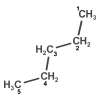
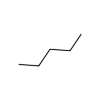
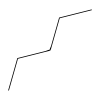
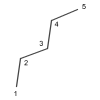
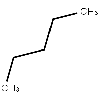
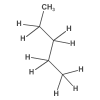
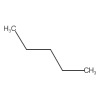
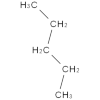
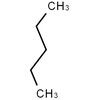
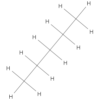
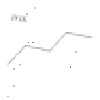
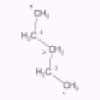
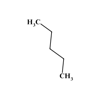
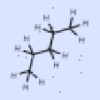
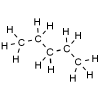
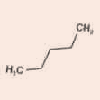
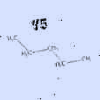
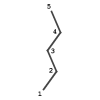
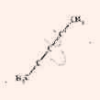
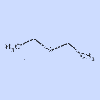


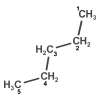
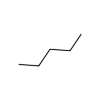
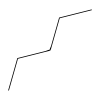
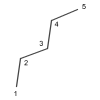
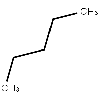
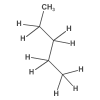
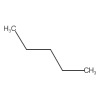
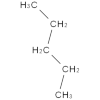
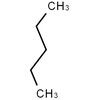
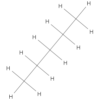
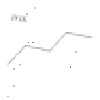
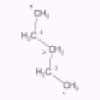
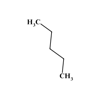
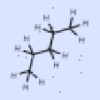
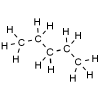
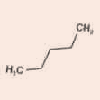
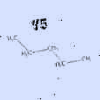
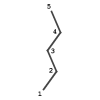
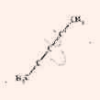
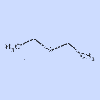

In [5]:
smiles = "CCCCC"
with RandomDepictor(seed=1) as depictor:
    random_images = []
    for index in range(20):
        if index < 10:
            depiction, cx_smiles = depictor.random_depiction_with_coordinates(smiles,
                                                                              shape=(100,100))
        else:
            depiction, cx_smiles = depictor.random_depiction_with_coordinates(smiles,
                                                                              augment=True,
                                                                              shape=(100,100))
        print(f"{cx_smiles}")
        random_images.append(depiction)
        

ipyplot.plot_images(random_images, max_images=100, img_width=100)

## Create random hand-drawn like depictions

After calling an instance of RandomDepictor, this instance can simply be called as a function in order to generate a chemical structure depiction using CDK, RDKit, Indigo or PIKAChU (randomly chosen) and apply random augmentations and random background addition.

c:\Users\Otto Brinkhaus\anaconda3\envs\RanDepict\lib\site-packages\ipyplot\_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



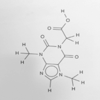
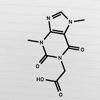
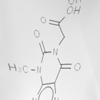
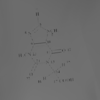
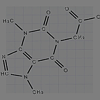
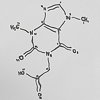
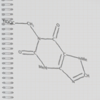
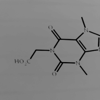
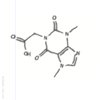
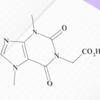
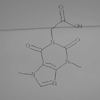
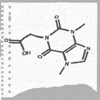
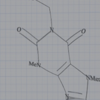
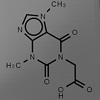
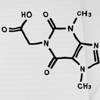
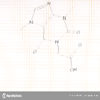
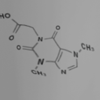
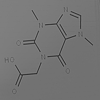
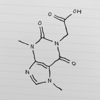
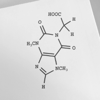


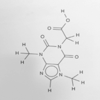
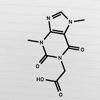
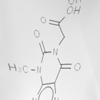
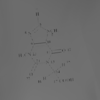
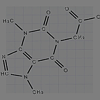
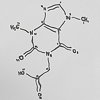
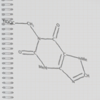
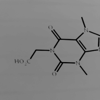
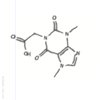
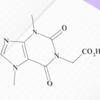
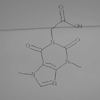
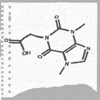
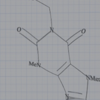
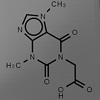
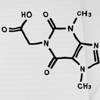
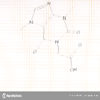
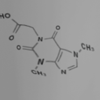
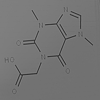
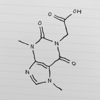
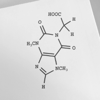

In [6]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(hand_drawn=True) as depictor:
    random_augmented_images = []
    for _ in range(20):
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=100)

## 

## Create and save a batch of images

After calling an instance of RandomDepictor, simply call the method depict_save().

Args:

- smiles_list (List[str]): List of SMILES str
- images_per_structure (int): Amount of images to create per SMILES str
- output_dir (str): Output directory 
- augment (bool): Boolean that indicates whether or not to use augmentations
- ID_list (List[str]): List of IDs (should be as long as smiles_list)
- shape (Tuple[int, int], optional): image shape. Defaults to (299, 299).
- processes (int, optional): Number of parallel threads. Defaults to 4.
- seed (int, optional): Seed for pseudo-random decisions. Defaults to 42.

In [7]:
# Make sure the output directories exist
if not os.path.exists('not_augmented'):
        os.mkdir('not_augmented')
        
if not os.path.exists('augmented'):
        os.mkdir('augmented')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save([smiles], 20, 'not_augmented', False, ['caffeine'], (299, 299), 5)
    depictor.batch_depict_save([smiles], 20, 'augmented', True, ['caffeine'], (299, 299), 5)
    

In [8]:
if not os.path.exists('kohulan'):
    os.mkdir("kohulan")
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
r_smiles = "[R1]N1C=NC2=C1[X](=O)N(C(=O)N2C)[R]"
seed = 233
r_seed = 1
with RandomDepictor(1) as depictor:
    depictor.depict_save(smiles, 1, 'kohulan', False, 'caffeine_299_299', (299, 299), seed=seed)
    depictor.depict_save(smiles, 1, 'kohulan', True, 'caffeine_aug_299_299', (299, 299), seed=seed)
    depictor.depict_save(smiles, 1, 'kohulan', False, 'caffeine_512_512', (512, 512), seed=seed)
    depictor.depict_save(smiles, 1, 'kohulan', True, 'caffeine_aug_512_512', (512, 512), seed=seed)
    depictor.depict_save(r_smiles, 1, 'kohulan', False, 'caffeine_R_299_299', (299, 299), seed=r_seed)
    depictor.depict_save(r_smiles, 1, 'kohulan', True, 'caffeine_R_aug_299_299', (299, 299), seed=r_seed)
    depictor.depict_save(r_smiles, 1, 'kohulan', False, 'caffeine_R_512_512', (512, 512), seed=r_seed)
    depictor.depict_save(r_smiles, 1, 'kohulan', True, 'caffeine_R_aug_512_512', (512, 512), seed=r_seed)

Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R_13


## Create a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.25
- pikachu_proportion: float = 0.25
- cdk_proportion: float = 0.35
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42

* Note: Have a look at examples/generate_depiction_grids_with_fingerprints.py to see how this function was used to generate the grid figures from our publication.

c:\Users\Otto Brinkhaus\anaconda3\envs\RanDepict\lib\site-packages\ipyplot\_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



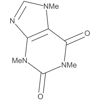
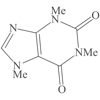
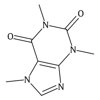
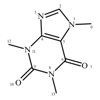
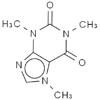
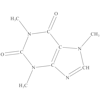
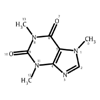
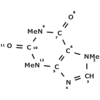
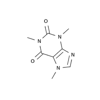
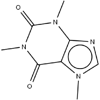
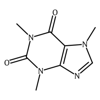
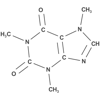
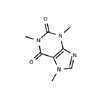
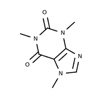
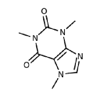
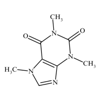
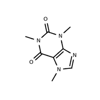
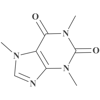
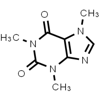
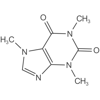


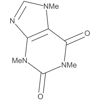
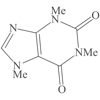
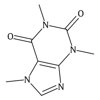
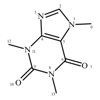
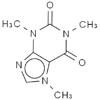
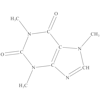
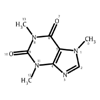
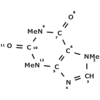
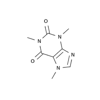
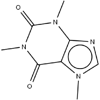
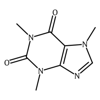
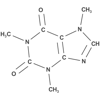
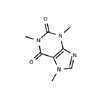
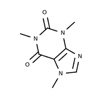
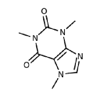
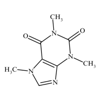
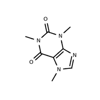
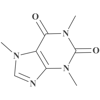
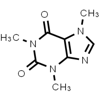
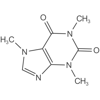

In [9]:
# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

with RandomDepictor(42) as depictor:
    fp_depictions = depictor.batch_depict_with_fingerprints([smiles],
                                                         20,
                                                         aug_proportion = 0)
    # TODO: Fix this
    #fp_aug_depictions = depictor.batch_depict_with_fingerprints([smiles],
    #                                                     20,
    #                                                     aug_proportion = 1)
ipyplot.plot_images(fp_depictions, max_images=20, img_width=100)
# ipyplot.plot_images(fp_aug_depictions, max_images=20, img_width=100)

## Create and save a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_save_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- output_dir: str
- ID_list: List[str]
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.3
- cdk_proportion: float = 0.55
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42


*Note: The images that are created here, were used for the animations in the GitHub repository

In [10]:
# Make sure the output directories exist
if not os.path.exists('not_augmented_fingerprint'):
        os.mkdir('not_augmented_fingerprint')
        
if not os.path.exists('augmented_fingerprint'):
        os.mkdir('augmented_fingerprint')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'not_augmented_fingerprint',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 0)
    # TODO: FIX THIS
    #depictor.batch_depict_save_with_fingerprints([smiles], 
    #                                             100, 
    #                                             'augmented_fingerprint',
    #                                            ['caffeine_{}'.format(n) for n in range(100)],
    #                                            aug_proportion = 1)

## Artificial generation of SMILES that represent markush structures

Generate markush structures based on list of SMILES strings

In [11]:
markush_generator = RandomMarkushStructureCreator()
input_smiles = ['CN1C=NC2=C1C(=O)N(C(=O)N2C)C'] * 100
markush_smiles = markush_generator.generate_markush_structure_dataset(input_smiles)
markush_smiles

['CN1C=NC2=C1C(=O)N(C)C(=O)N2C[X20]',
 'C1=NC2=C(N1C[Z7])[X](=O)N(C(=O)N2C[X2])[X8]([H])([H])[H]',
 'C1=NC2=C(C(=O)N(C[Y1])C(=O)N2[R7e]([H])([H])[H])N1[Y4]([H])([H])[H]',
 'CN1C=NC2=C1C(=O)N(C)C(=O)N2C[X12]',
 'CN1C2=C(N(C=N2)[R]([H])([H])[H])[R13d](=O)N(C[X9])C1=O',
 'CN1C(=O)C2=C(N=[Y2c]([H])N2C[X8c])N(C1=O)[Z13]([H])([H])[H]',
 'CN1C2=C(C(=O)N(C)C1=O)N(C=N2)[X11]([H])([H])[H]',
 'CN1C=NC2=C1C(=O)N(C[R18])[X2](=O)N2C([Z15])[R16]',
 'CN1C=NC2=C1[Y14](=O)N(C)C(=O)N2C[X18b]',
 'CN1C2=C(N(C=N2)[R12c]([H])([H])[H])[R2](=O)N(C1=O)[Z]([H])([H])[H]',
 'CN1C=NC2=C1C(=O)N(C[Z])C(=O)N2C[X10e]',
 'CN1C=NC2=C1[Z2b](=O)N(C)[X](=O)N2C',
 'CN1C=NC2=C1C(=O)N(C[X7])C(=O)N2C',
 'CN1C2=C(C(=O)N(C)C1=O)N(C=N2)C[Z9]',
 'CN1C2=C(C(=O)N(C)C1=O)N(C)[R17]([H])=N2',
 'CN1C2=C(C(=O)N(C1=O)[X]([H])([H])[H])N(C=N2)C[X4d]',
 'CN1C=NC2=C1[Y18](=O)N(C)C(=O)N2C[Y20]',
 'CN1C2=C(N=C1[X8b])N(C(=O)N(C)C2=O)C([X])[R2]',
 'CN1C2=C(C(=O)N(C[R11f])C1=O)N(C=N2)[R5]([H])([Z])[Z]',
 'CN1C2=C(C(=O)N(C)C1=O)N(C=N2)[Z12c]([H])([H

Depict the markush structures using RanDepict

[16:41:34] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:34] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:34] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:34] WARNING: not removing hydrogen atom with dummy atom neighbors


Warning! Rogue electron.
R18_10
Warning! Rogue electron.
Z15_15
Warning! Rogue electron.
R16_16
Warning! Rogue electron.
R18_10
Warning! Rogue electron.
Z15_15
Warning! Rogue electron.
R16_16
Warning! Rogue electron.
Z9_14
Warning! Rogue electron.
Z9_14
Warning! Rogue electron.
Z20_14
Warning! Rogue electron.
Z20_14
Warning! Rogue electron.
R1_10
Warning! Rogue electron.
R1_10
Warning! Rogue electron.
Z1_10
Warning! Rogue electron.
Z_15
Warning! Rogue electron.
Z1_10
Warning! Rogue electron.
Z_15


[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:38] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:39] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:39] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:39] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:41:39] WARNING: not removing hydrogen atom with dummy atom neighbors



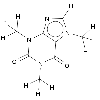
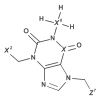
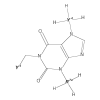
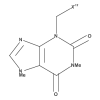
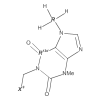
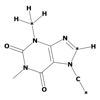
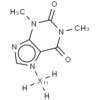
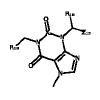
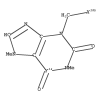
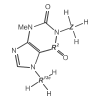
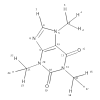
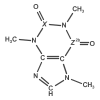
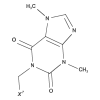
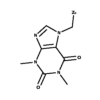
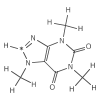
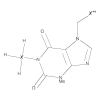
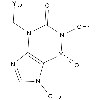
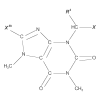
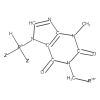
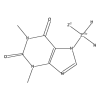
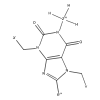
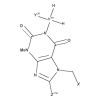
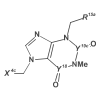
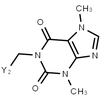
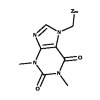
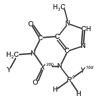
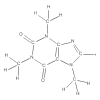
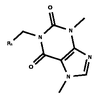
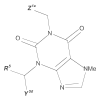
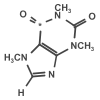
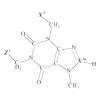
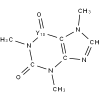
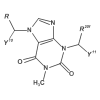
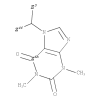
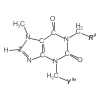
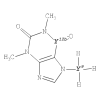
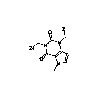
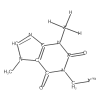
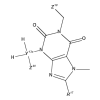
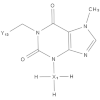
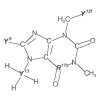
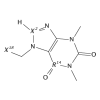
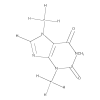
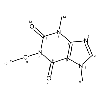
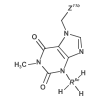
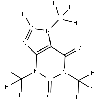
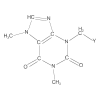
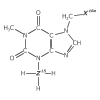
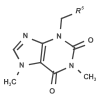
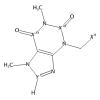
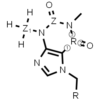
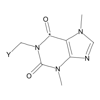
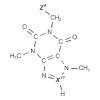
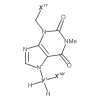
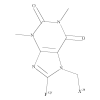
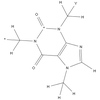
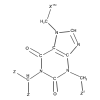
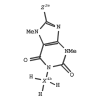
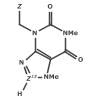
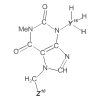
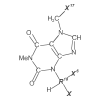
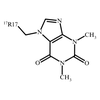
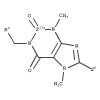
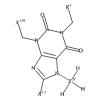
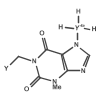
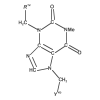
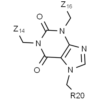
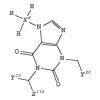
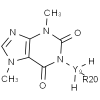
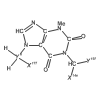
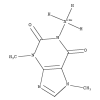
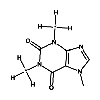
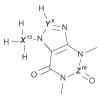
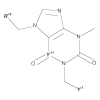
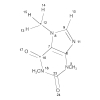
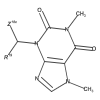
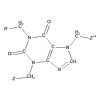
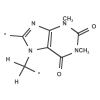
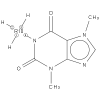
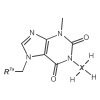
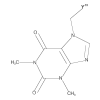
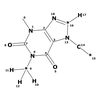
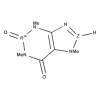
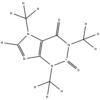
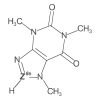
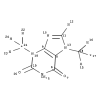
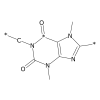
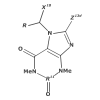
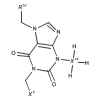
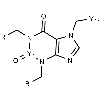
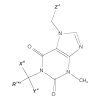
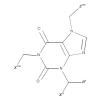
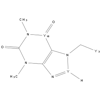
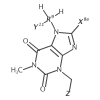
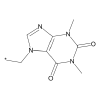
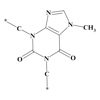
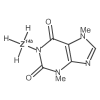
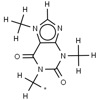
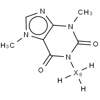
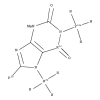


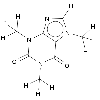
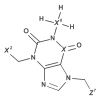
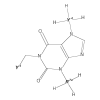
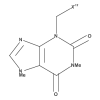
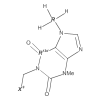
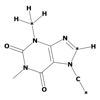
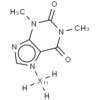
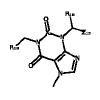
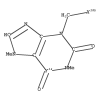
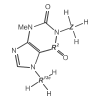
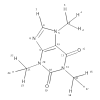
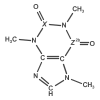
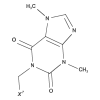
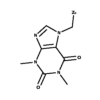
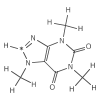
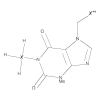
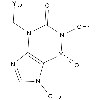
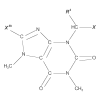
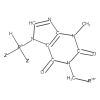
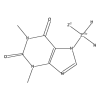
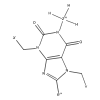
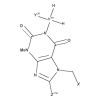
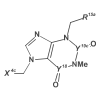
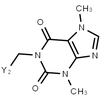
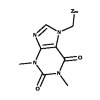
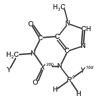
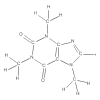
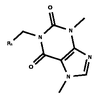
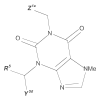
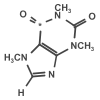
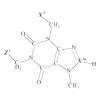
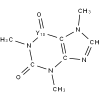
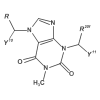
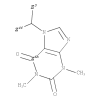
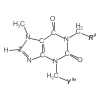
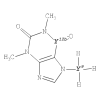
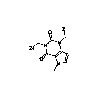
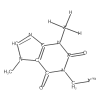
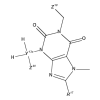
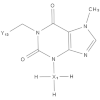
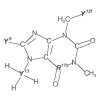
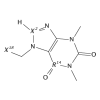
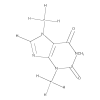
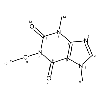
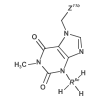
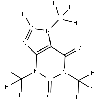
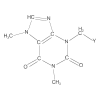
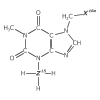
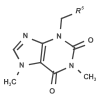
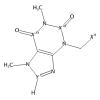
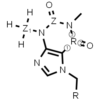
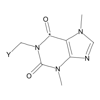
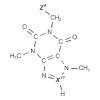
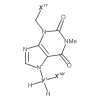
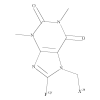
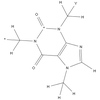
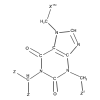
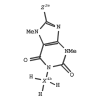
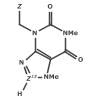
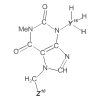
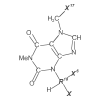
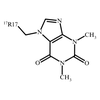
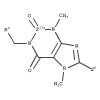
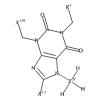
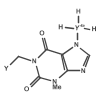
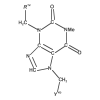
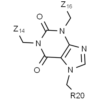
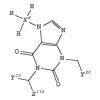
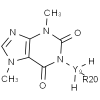
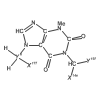
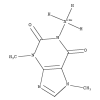
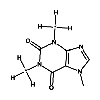
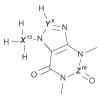
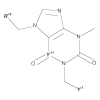
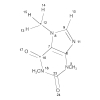
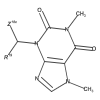
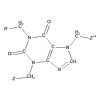
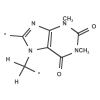
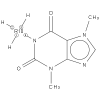
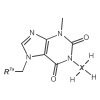
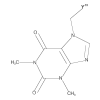
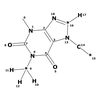
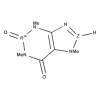
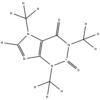
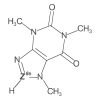
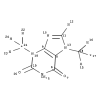
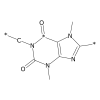
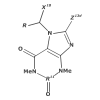
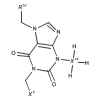
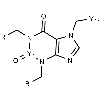
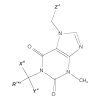
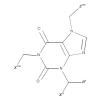
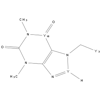
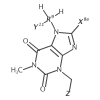
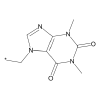
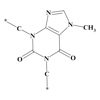
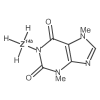
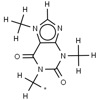
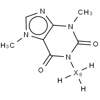
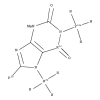

In [12]:
with RandomDepictor() as depictor:
    markush_depictions = [depictor.random_depiction(smi, shape=(100,100))
                          for smi in markush_smiles]
ipyplot.plot_images(markush_depictions, max_images=100, img_width=100)